<a href="https://colab.research.google.com/github/ravi161995/Sentiment_Analyesis_project_01/blob/main/src/Notebooks/Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/sentiment-cleaned-datasetskazanovasentiment140/sentiment140_cleaned.csv"
df = pd.read_csv(data_path, encoding='utf-8')

df.head()


,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (1280000, 7)
Test shape: (320000, 7)


In [ ]:
train_path = "/content/drive/MyDrive/sentiment-cleaned-datasetskazanovasentiment140/train.csv"
test_path = "/content/drive/MyDrive/sentiment-cleaned-datasetskazanovasentiment140/test.csv"

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print("✅ Train and test files saved successfully!")


✅ Train and test files saved successfully!


In [ ]:
import pandas as pd

train_data = train_df[['cleaned_text', 'target']]
test_data = test_df[['cleaned_text', 'target']]

train_data.head()

,cleaned_text,target
1374558,jbtaylor ya quotid like palm pre touchstone ch...,1
1389115,felt earthquake afternoon seems epicenter,1
1137831,ruffles shirts like likey,1
790714,pretty bad night crappy morningfml buttface di...,0
1117911,dcbriccetti yeah clear view,1


In [ ]:
train_data.isnull().sum()

,0
cleaned_text,260
target,0


In [ ]:
test_data.head()


,cleaned_text,target
541200,chrishasboobs ahhh hope ok,0
750,misstoriblack cool tweet apps razr 2,0
766711,tiannachaos know family drama lamehey next tim...,0
285055,school email wont open geography stuff revise ...,0
705995,upper airways problem,0


In [ ]:
test_data.isnull().sum()

,0
cleaned_text,62
target,0


In [ ]:
train_data = train_df[['cleaned_text', 'target']].copy()
test_data = test_df[['cleaned_text', 'target']].copy()

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [ ]:
# converting the text into numbers using TF IDF

vectorizer = TfidfVectorizer(max_features=10000)
x_train = vectorizer.fit_transform(train_data['cleaned_text'])
x_test = vectorizer.transform(test_data['cleaned_text'])

y_train = train_data['target']
y_test = test_data['target']

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "XG boost":xgb.XGBClassifier(n_estimators=50, learning_rate=0.1)
}

In [ ]:
results = {}
for name, model in models.items():
    scores = cross_val_score(model,x_train,y_train, cv=5, scoring="accuracy")
    results[name] = scores
    print(f"{name} → accurary: {scores.mean():.4f}")

Logistic Regression → accurary: 0.7792
XG boost → accurary: 0.6796


In [ ]:
# Train Logistic Regression baseline
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(x_train, y_train)

# Predict
y_pred = clf.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    159460
           1       0.77      0.80      0.78    160478

    accuracy                           0.78    319938
   macro avg       0.78      0.78      0.78    319938
weighted avg       0.78      0.78      0.78    319938



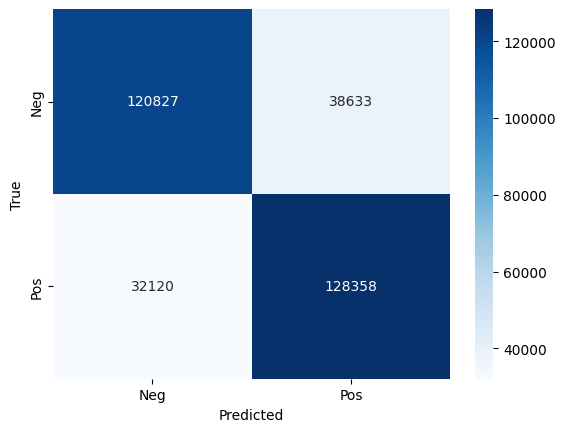

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()